# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
# Create the dataframe
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Display the dataframe
print(student_data)

   Age  Tardies
0   17       10
1   51        1
2   27        5
3   21        9
4   36        4
5   48        2
6   19        9
7   26        6
8   54        0
9   30        3


Draw a dispersion diagram (scatter plot) for the data.

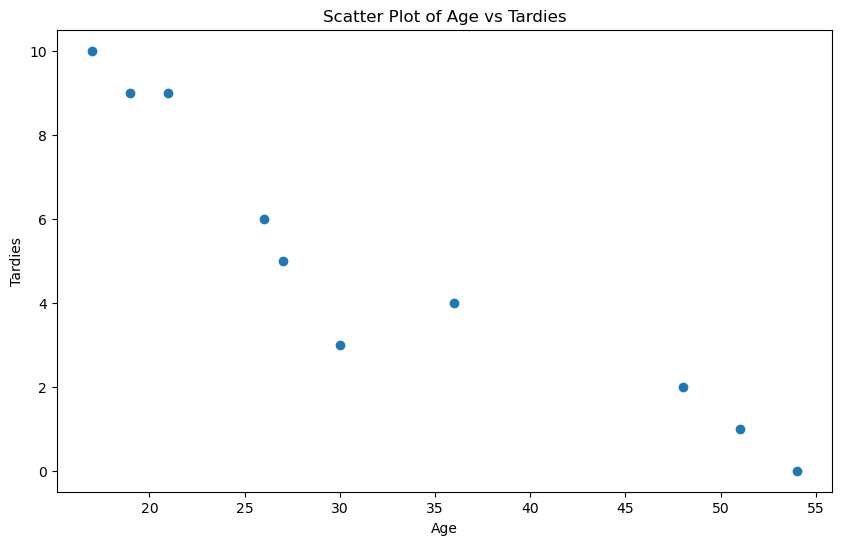

In [3]:
# Your code here
# Draw scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Scatter Plot of Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

From the scatter plot, we might see a negative trend indicating that younger students tend to have more tardies. This supports the hypothesis that younger students are more likely to be late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# your code here
# Calculate covariance
covariance = np.cov(student_data['Age'], student_data['Tardies'])[0, 1]

# Calculate correlation
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])[0, 1]

print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")


Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# your explanation here
Covariance vs. Correlation:

Covariance measures the directional relationship between two variables, 

Correlation measures the strength and direction of this relationship.
In this case, the negative covariance and correlation confirm a
negative relationship between age and tardiness.

Now, let's build a regression model. Our outcome variable
(dependent variable) will be Tardies, and our predictor
(independent variable) will be Age. We will use a simple linear
regression.

Plot your regression model on your scatter plot.

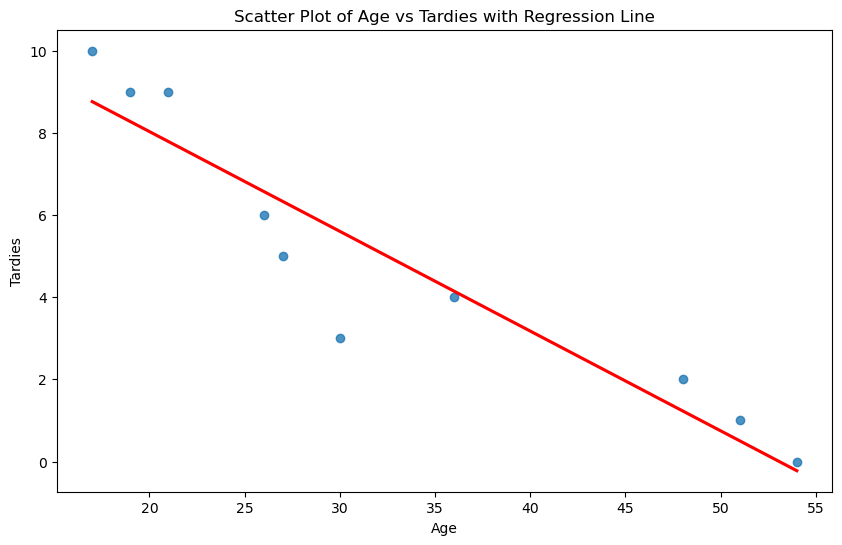

In [5]:
# Your code here.
# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Tardies', data=student_data, ci=None, line_kws={"color": "red"})
plt.title('Scatter Plot of Age vs Tardies with Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

Model Interpretation:

The summary provides the coefficients of the regression line, the R-squared value, and the p-values. The slope of the line (negative coefficient for Age) indicates that as age increases, tardiness decreases. The R-squared value tells us how well the model explains the variability of the response data (Tardies).

Conclusion:
From the regression analysis, we see that age is a significant predictor of tardiness, with younger students being more likely to be tardy. The model's R-squared value indicates a moderate fit.



## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles2.csv")


# Select the variables for analysis
selected_vars = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_data = vehicles[selected_vars]

# Display the first few rows of the dataframe
print(vehicles_data.head())


   Year  Cylinders  Fuel Barrels/Year  Combined MPG  Fuel Cost/Year  \
0  1984        4.0          19.388824            17            1950   
1  1984        6.0          25.354615            13            2550   
2  1985        4.0          20.600625            16            2100   
3  1985        6.0          25.354615            13            2550   
4  1987        6.0          20.600625            16            2550   

   CO2 Emission Grams/Mile  
0               522.764706  
1               683.615385  
2               555.437500  
3               683.615385  
4               555.437500  


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
# Your code here.
# Calculate correlations
correlations = vehicles_data.corr()

# Display the correlation matrix
print(correlations)

#We look at the correlation of each independent variable with CO2 Emission Grams/Mile. 
Variables with higher absolute values of correlation are more important predictors.

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Your code here.
model = smf.ols('Q("CO2 Emission Grams/Mile") ~ Year + Cylinders + Q("Fuel Barrels/Year") + Q("Combined MPG") + Q("Fuel Cost/Year")', data=vehicles_data).fit()



Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [16]:
# Your code here.
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Q("CO2 Emission Grams/Mile")   R-squared:                       0.981
Model:                                      OLS   Adj. R-squared:                  0.981
Method:                           Least Squares   F-statistic:                 3.687e+05
Date:                          Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                                  00:14:44   Log-Likelihood:            -1.5173e+05
No. Observations:                         35952   AIC:                         3.035e+05
Df Residuals:                             35946   BIC:                         3.035e+05
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
# Your code here.
# Create the dataframe
party_data = pd.DataFrame({
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
})

# Display the dataframe
print(party_data)


    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

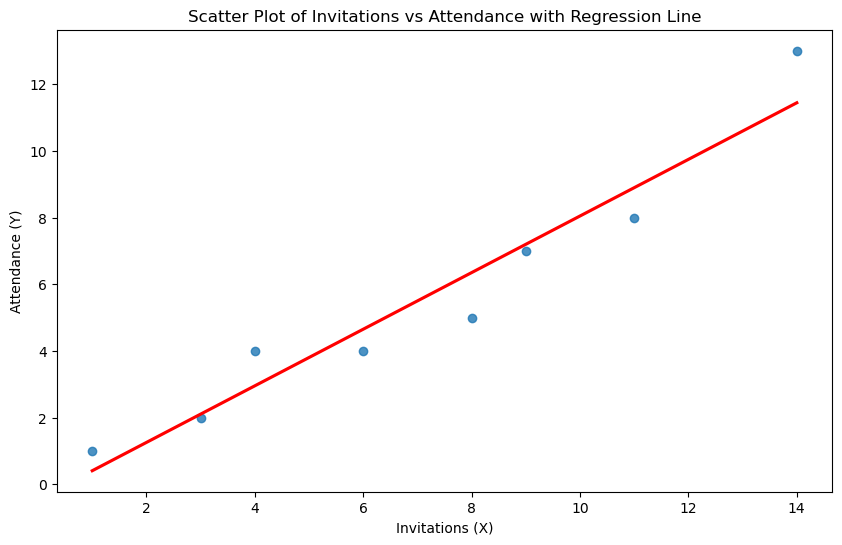

In [18]:
# Your code here.
# Draw scatter plot and fit regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='X', y='Y', data=party_data, ci=None, line_kws={"color": "red"})
plt.title('Scatter Plot of Invitations vs Attendance with Regression Line')
plt.xlabel('Invitations (X)')
plt.ylabel('Attendance (Y)')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

The plot suggests a positive linear relationship. However, there may be some outliers affecting the fit.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           0.000102
Time:                        00:19:37   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.5

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


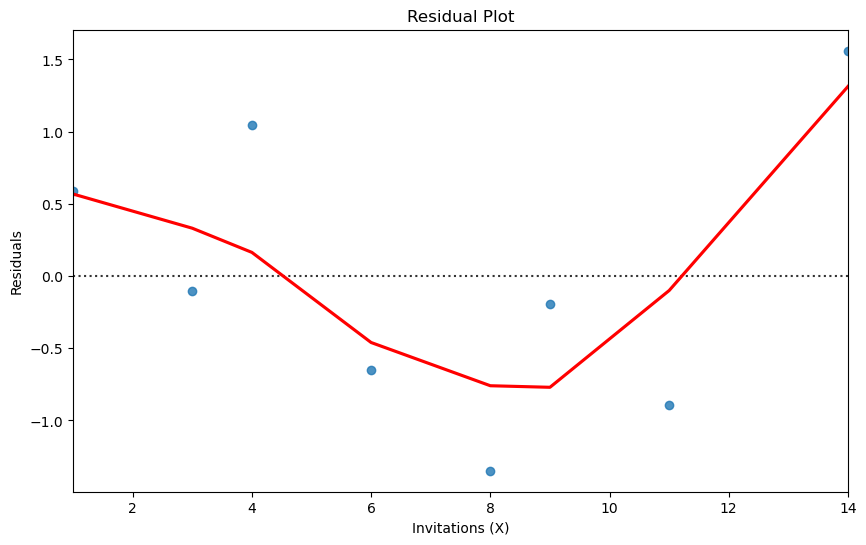

In [21]:
# Your response here.
# Build regression model using statsmodels
model_party = smf.ols('Y ~ X', data=party_data).fit()

# Print the summary of the model
print(model_party.summary())
# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x='X', y='Y', data=party_data, lowess=True, line_kws={"color": "red"})
plt.title('Residual Plot')
plt.xlabel('Invitations (X)')
plt.ylabel('Residuals')
plt.show()






In [22]:
# Identify and remove outliers (manually or using IQR method, etc.)
party_data_cleaned = party_data[party_data['X'] < 14]  # Example condition to remove outlier

# Refit the model
model_party_cleaned = smf.ols('Y ~ X', data=party_data_cleaned).fit()

# Print the summary of the cleaned model
print(model_party_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           0.000264
Time:                        00:19:50   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.5

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


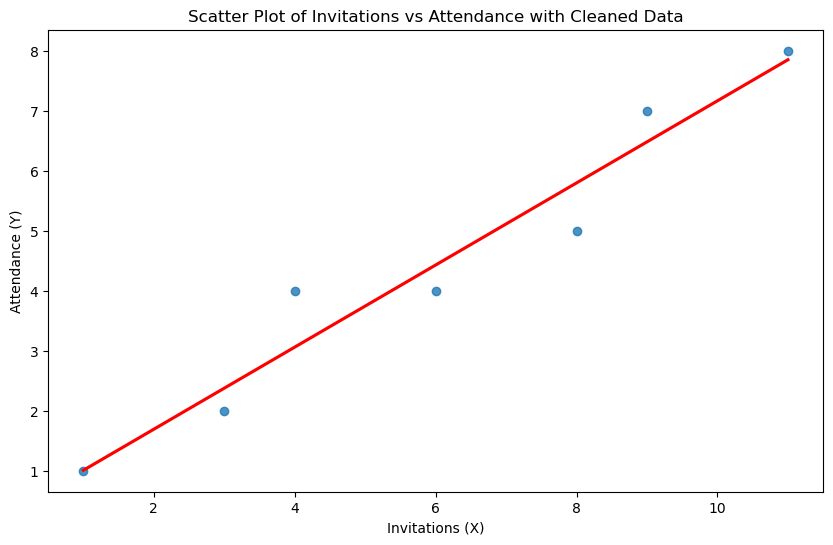

In [20]:
# Plot the cleaned scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='X', y='Y', data=party_data_cleaned, ci=None, line_kws={"color": "red"})
plt.title('Scatter Plot of Invitations vs Attendance with Cleaned Data')
plt.xlabel('Invitations (X)')
plt.ylabel('Attendance (Y)')
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*


By comparing the results from the original and cleaned data, we can observe the effect of outliers. Removing outliers usually improves the model fit, as indicated by changes in the coefficients, R-squared value, and p-values.